# Hospital Survey Data: Unmet Analysis

## Import Libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

## Load Survey Dataset + Cleaning

In [3]:
survey_df = pd.read_excel("./data/survey_responses.xlsx")
survey_df.head()

,#,Reporting Quarter,Hospital Name,Art therapy,Music therapy,Artist in Residence,Addressing communication barriers,Addressing feelings,Coping with hospitalization,Decreasing pain perception,...,Number of White or Caucasian patients,Number of Black or African American patients,Number of patients of another race or unknown race,Number of Hispanic or Latino patients,Response Type,Start Date (UTC),Stage Date (UTC),Submit Date (UTC),Network ID,Tags
0,b5fe0pz2mibn56085b5fe4abz1x06b77,January - March 2024,Akron Children's Hospital,Art therapy,Music therapy,NaN,Addressing communication barriers,Addressing feelings,Coping with hospitalization,Decreasing pain perception,...,408.0,111.0,30.0,24.0,completed,2025-04-02 14:15:49,NaN,2025-04-02 14:23:31,72e438beab,NaN
1,86qiuhhqowuw8xcfzhlua86qiuhis9nu,April - June 2024,Akron Children's Hospital,Art therapy,Music therapy,NaN,Addressing communication barriers,Addressing feelings,Coping with hospitalization,Decreasing pain perception,...,398.0,90.0,32.0,19.0,completed,2025-04-02 14:02:24,NaN,2025-04-02 14:15:01,72e438beab,NaN
2,v1wtywii1ao2d4ynuv1v1wt9y0r26n27,October - December 2024,Nationwide Children's Hospital,NaN,Music therapy,NaN,Addressing communication barriers,Addressing feelings,NaN,Decreasing pain perception,...,56.0,14.0,3.0,4.0,completed,2025-02-10 13:32:47,NaN,2025-02-10 13:43:50,dcc9944acb,NaN
3,mcztrdruc1khh47or7mcztrrv9vfcpvd,October - December 2024,University Hospitals- Rainbow Babies and Child...,Art therapy,NaN,NaN,NaN,NaN,NaN,NaN,...,65.0,41.0,0.0,2.0,completed,2025-01-21 22:59:06,NaN,2025-01-21 23:12:09,656147dd83,NaN
4,jzy2f2pv8gxahz0djzy2o3y6cj0vm66h,October - December 2024,ProMedica Russell J. Ebeid Children's Hospital,NaN,Music therapy,NaN,Addressing communication barriers,Addressing feelings,Coping with hospitalization,Decreasing pain perception,...,52.0,20.0,3.0,4.0,completed,2025-01-17 20:20:59,NaN,2025-01-17 20:42:31,8c7ae757df,NaN


In [4]:
# Check for duplicated rows
survey_df.duplicated().sum()

0

Since none of the rows are duplicated, we can drop some rows that served as admin fields, where they provide little to no additional meaning to our analysis.

In [5]:
# Drop unnecessary columns (Admin fields)
survey_df.drop(columns=["#", "Response Type", "Start Date (UTC)", "Stage Date (UTC)", "Submit Date (UTC)", "Network ID", "Tags"], inplace=True)

In [6]:
# Dataset after dropping unnecessary columns
survey_df.head()

,Reporting Quarter,Hospital Name,Art therapy,Music therapy,Artist in Residence,Addressing communication barriers,Addressing feelings,Coping with hospitalization,Decreasing pain perception,Eliciting attention/ focus,...,Number of male patients,Number of transgender non-binary gender non-conforming patients,Number of patients 5 years and under,Number of patients aged 6-11 years,Number of patients aged 12-17 years,Number of patients 18 years and over,Number of White or Caucasian patients,Number of Black or African American patients,Number of patients of another race or unknown race,Number of Hispanic or Latino patients
0,January - March 2024,Akron Children's Hospital,Art therapy,Music therapy,NaN,Addressing communication barriers,Addressing feelings,Coping with hospitalization,Decreasing pain perception,NaN,...,180.0,0.0,57.0,59.0,414.0,18.0,408.0,111.0,30.0,24.0
1,April - June 2024,Akron Children's Hospital,Art therapy,Music therapy,NaN,Addressing communication barriers,Addressing feelings,Coping with hospitalization,Decreasing pain perception,NaN,...,170.0,0.0,51.0,53.0,397.0,19.0,398.0,90.0,32.0,19.0
2,October - December 2024,Nationwide Children's Hospital,NaN,Music therapy,NaN,Addressing communication barriers,Addressing feelings,NaN,Decreasing pain perception,Eliciting attention/ focus,...,45.0,0.0,23.0,22.0,20.0,11.0,56.0,14.0,3.0,4.0
3,October - December 2024,University Hospitals- Rainbow Babies and Child...,Art therapy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72.0,0.0,59.0,18.0,27.0,4.0,65.0,41.0,0.0,2.0
4,October - December 2024,ProMedica Russell J. Ebeid Children's Hospital,NaN,Music therapy,NaN,Addressing communication barriers,Addressing feelings,Coping with hospitalization,Decreasing pain perception,Eliciting attention/ focus,...,30.0,1.0,31.0,29.0,19.0,0.0,52.0,20.0,3.0,4.0


## Dataset Structure

The dataset comes from a quarterly survey completed by hospitals that partner with Sam's Fans. It captures therapy activities, patient demographics, departments served, and therapy outcomes/goals across multiple hospitals and time periods.

### Variable Groups

1. Core Identifiers
- `Reporting Quarter` - The time period of the report
- `Hospital Name` - The hospital reporting the data

2. Therapy Modalities 
- `Art therapy`, `Music therapy`, `Artist in Residence` -> Yes/No flags per hospital/quarter to indicate which therapies were offered

3. Therapy Goals/Outcomes (duplicated for each therapy)
- `Addressing communication barriers`
- `Addressing feelings`
- `Coping with hospitalization`
- `Decreasing pain perception`
- `Eliciting attention/ focus`
- `Encouraging positive patient-family interaction`
- `End-of-life care and coping`
- `Finding hope`
- `Grief/ Bereavement`
- `Helping caregivers cope`
- `Improving quality of life`
- `Increasing alertness`
- `Increasing autonomy`
- `Legacy building/ memory making`
- `Managing stress and anxiety`
- `Opportunities for choice and control`
- `Overcoming adversity`
- `Promoting self-expression`
- `Rapport building`
- `Sensory/ environmental stimulation`
- `Social/ intellectual stimulation`
- `Support during difficult procedures`
- `Symptom management`

4. Music Therapy Activities 
- `Active music listening`
- `Heartbeat recordings`
- `Instrument playing`
- `Instrumental and melodic improvisation`
- `Lyric analysis and song discussion`
- `Music and movement`
- `Music listening (live or recorded)`
- `Music-assisted relaxation`
- `Musical "play"`
- `Musical games`
- `Painting/drawing to music`
- `Singing`
- `Using music as a coping skill`

5. Art Therapy Activities
- `Bookmaking`
- `Buddha Board`
- `Collage`
- `Drawing`
- `Graphic design`
- `Intention beads`
- `Jewelry making`
- `Model magic/clay`
- `Painting`
- `Poetry`
- `Pretend play`
- `Sculpture`
- `Watercolors`
- `Weaving`

6. Art in Residence related 
- `Artist-in-Residence programs offered this quarter`


7. Department/Setting Flags -> which units therapy was delivered in
- `Behavioral Health`
- `Bone Marrow Transplant (BMT)/ Hematology`
- `Emergency Department`
- `Gastroenterology`
- `Infusion Services`
- `Intensive Care Unit (ICU)`
- `Long-Term Care`
- `Neonatal Intensive Care Unit (NICU)`
- `Neurology`
- `Nutrition and Dietetics`
- `Oncology`
- `Orthopedics`
- `Outpatient`
- `Pediatrics`
- `Physiotherapy`
- `Post-Critical Care/ Step Down`
- `Surgery`
- `Transitional Care Unit (TCU)`
- `None of the above/ Not applicable`

8. Program Delivery Metrics
- `Average session/group length`
- `Hospital`
- `In-home`
- `Number of unique unduplicated patients`
- `Number of individual sessions`
- `Number of group sessions`
- `Total number of participants in group sessions`
- `Number of patients declinedunavailable for services`
- `Number of families served`

9. Gender Groups
- `Number of female patients`
- `Number of male patients`
- `Number of transgender non-binary gender non-conforming patients`

10. Age Groups
- `Number of patients 5 years and under`
- `Number of patients aged 6-11 years`
- `Number of patients aged 12-17 years`
- `Number of patients 18 years and over`

11. Racial & Ethnics Groups
- `Number of White or Caucasian patients`
- `Number of Black or African American patients`
- `Number of patients of another race or unknown race`
- `Number of Hispanic or Latino patients`

## Logistics Regression: Predict Hospitals likely to have unmet need

One of the more significant column, in our opinion, is `Number of patients declined/unavailable for services`. This is defined to be the number of patients who wanted or needed therapy, but the hospital could not provide it. According to the survey context, this includes patients who were:
* On the schedule but had their session canceled
* Recommended therapy but no therapist was available
* Missed out due to limited capacity, space, or scheduling
* Otherwise unable to access therapy because of hospital-side constraints

Thus, it represents a **gap between need and service**. This column is incredibly valuable because it helps Sam's Fans:
* See where they're failing short on access
* Know which hospitals need more staffing or funding
* Argue for change with concrete, quantitative evidence

In [10]:
# General information about the `number of patients declined/unavailable` for services
survey_df["Number of patients declinedunavailable for services"].describe()

count    144.000000
mean      44.270833
std       79.244794
min        0.000000
25%        0.000000
50%        2.000000
75%       74.500000
max      750.000000
Name: Number of patients declinedunavailable for services, dtype: float64

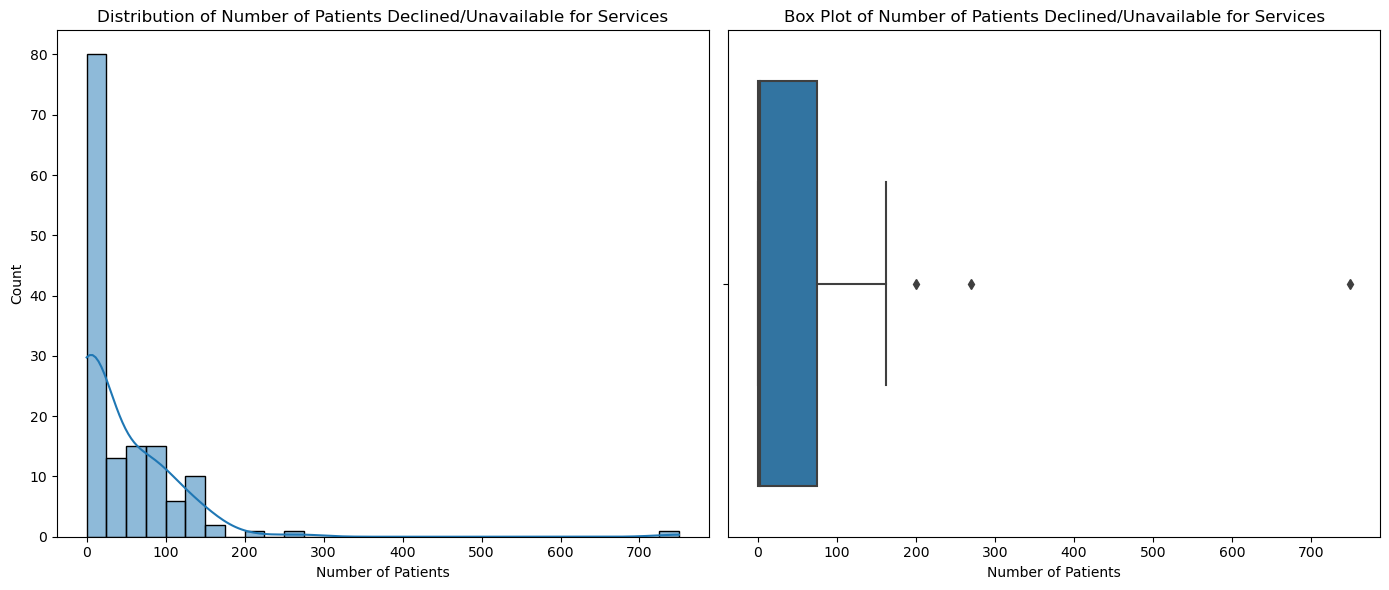

In [14]:
# Histogram + Box plot for distribution of `number of patients declined/unavailable` for services
unmet_stat = "Number of patients declinedunavailable for services"

plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=survey_df, x=unmet_stat, bins=30, kde=True)
plt.title("Distribution of Number of Patients Declined/Unavailable for Services")
plt.xlabel("Number of Patients")
plt.ylabel("Count")

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(data=survey_df, x=unmet_stat)
plt.title("Box Plot of Number of Patients Declined/Unavailable for Services")
plt.xlabel("Number of Patients")

plt.tight_layout()
plt.show()

Now, we will build an OLS regression (linear regression) model to quantifies the relationship between unmet need and potential causes. Through the model, we can analyze the coefficients to understand how much each factor increases or decreases unmet need. This will help us to explain (and can use to predict) the number of patients who were declined/unavailable for services.

In [19]:
# Define target variable (numeric)
target = "Number of patients declinedunavailable for services"

In [56]:
# Drop outliers
outlier_threshold = survey_df[target].quantile(0.99)
survey_df = survey_df[survey_df[target] <= outlier_threshold]

In [65]:
# Define features (categorical + numeric)
predictors = [
    # Therapy types offered 
    "Art therapy", "Music therapy", "Artist in Residence",

    # Program delivery metrics
    "Number of individual sessions", "Number of group sessions", "Total number of participants in group sessions", "Average sessiongroup length", "Number of families served", "Hospital", "In-home",

    # Departments/Settings Served
    "Behavioral Health", "Bone Marrow Transplant (BMT)/ Hematology", "Emergency Department", "Gastroenterology", "Infusion Services", "Intensive Care Unit (ICU)", "Long-Term Care", 
    "Neonatal Intensive Care Unit (NICU)", "Neurology", "Nutrition and Dietetics", "Oncology", "Orthopedics", "Outpatient", "Pediatrics", "Physiotherapy", "Post-Critical Care/ Step Down", "Surgery", "Transitional Care Unit (TCU)",

    # Demographics information
    "Number of female patients", "Number of male patients", "Number of transgender non-binary gender non-conforming patients", 
    "Number of patients 5 years and under", "Number of patients aged 6-11 years", "Number of patients aged 12-17 years", "Number of patients 18 years and over",
    "Number of White or Caucasian patients", "Number of Black or African American patients", "Number of patients of another race or unknown race", "Number of Hispanic or Latino patients"
]

# Transform text-based binary flags into 0/1 where appropriate
for col in predictors:
    if survey_df[col].dtype == "object":
        survey_df[col] = (survey_df[col] == col).astype(int)

In [66]:
# Design matrix & target vector
X = survey_df[predictors].copy().fillna(0)
y = survey_df[target]

In [67]:
# Fit OLS model
model = sm.OLS(y, X).fit()

In [68]:
# Show model summary (includes coefficients, p-values, R^2, etc.)
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                 OLS Regression Results                                                 
========================================================================================================================
Dep. Variable:     Number of patients declinedunavailable for services   R-squared (uncentered):                   0.933
Model:                                                             OLS   Adj. R-squared (uncentered):              0.910
Method:                                                  Least Squares   F-statistic:                              39.84
Date:                                                 Sat, 12 Apr 2025   Prob (F-statistic):                    6.61e-47
Time:                                                         21:44:40   Log-Likelihood:                         -595.03
No. Observations:                                                  142   AIC:                                      1264.
Df Residuals:                                                      105   BIC:                                      1373.
Df Model:                                                           37                                                  
Covariance Type:                                             nonrobust                                                  
===================================================================================================================================
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
Art therapy                                                       -58.9630     17.798     -3.313      0.001     -94.254     -23.672
Music therapy                                                     -38.4911     10.328     -3.727      0.000     -58.970     -18.012
Artist in Residence                                                 0.3357     17.641      0.019      0.985     -34.644      35.315
Number of individual sessions                                       0.1081      0.034      3.181      0.002       0.041       0.175
Number of group sessions                                           -0.7096      0.294     -2.412      0.018      -1.293      -0.126
Total number of participants in group sessions                      0.3718      0.072      5.196      0.000       0.230       0.514
Average sessiongroup length                                     -2.965e-13   2.91e-13     -1.020      0.310   -8.73e-13     2.8e-13
Number of families served                                          -0.1161      0.045     -2.598      0.011      -0.205      -0.028
Hospital                                                           70.0789     18.761      3.735      0.000      32.879     107.279
In-home                                                            32.7217     10.347      3.163      0.002      12.206      53.237
Behavioral Health                                                 -19.3827     12.645     -1.533      0.128     -44.455       5.689
Bone Marrow Transplant (BMT)/ Hematology                           -5.1124      7.504     -0.681      0.497     -19.992       9.768
Emergency Department                                               13.9285     16.532      0.843      0.401     -18.851      46.708
Gastroenterology                                                   -8.4354      8.774     -0.961      0.339     -25.833       8.962
Infusion Services                                                   4.7739      8.712      0.548      0.585     -12.500      22.048
Intensive Care Unit (ICU)                                         -27.6660     14.535     -1.903      0.060     -56.486       1.154
Long-Term Care                                                   -8.36e-14   5.44e-14     -1.538      0.127   -1.

In [69]:
# Extract statistically significant features
significant_features = model.pvalues[model.pvalues < 0.05].index.tolist()
significant_features

['Art therapy',
 'Music therapy',
 'Number of individual sessions',
 'Number of group sessions',
 'Total number of participants in group sessions',
 'Number of families served',
 'Hospital',
 'In-home',
 'Number of female patients',
 'Number of patients 5 years and under',
 'Number of patients aged 12-17 years',
 'Number of patients 18 years and over']

In [70]:
# Refit the model with only significant features
X_reduced = X[significant_features]

# Fit reduced model
model_reduced = sm.OLS(y, X_reduced).fit()
model_reduced_summary = model_reduced.summary()
model_reduced_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                 OLS Regression Results                                                 
========================================================================================================================
Dep. Variable:     Number of patients declinedunavailable for services   R-squared (uncentered):                   0.884
Model:                                                             OLS   Adj. R-squared (uncentered):              0.873
Method:                                                  Least Squares   F-statistic:                              82.66
Date:                                                 Sat, 12 Apr 2025   Prob (F-statistic):                    9.53e-55
Time:                                                         21:44:54   Log-Likelihood:                         -634.46
No. Observations:                                                  142   AIC:                                      1293.
Df Residuals:                                                      130   BIC:                                      1328.
Df Model:                                                           12                                                  
Covariance Type:                                             nonrobust                                                  
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Art therapy                                      -37.5698     10.370     -3.623      0.000     -58.085     -17.054
Music therapy                                    -24.0759      7.647     -3.148      0.002     -39.205      -8.947
Number of individual sessions                      0.1045      0.034      3.106      0.002       0.038       0.171
Number of group sessions                          -0.6869      0.129     -5.312      0.000      -0.943      -0.431
Total number of participants in group sessions     0.3530      0.041      8.672      0.000       0.272       0.434
Number of families served                         -0.0932      0.034     -2.726      0.007      -0.161      -0.026
Hospital                                          41.4339      9.196      4.506      0.000      23.241      59.627
In-home                                           14.5561      6.652      2.188      0.030       1.396      27.716
Number of female patients                          0.7135      0.086      8.302      0.000       0.543       0.884
Number of patients 5 years and under               0.4248      0.071      5.991      0.000       0.285       0.565
Number of patients aged 12-17 years               -0.4941      0.058     -8.544      0.000      -0.609      -0.380
Number of patients 18 years and over              -1.8283      0.350     -5.222      0.000      -2.521      -1.136
==============================================================================
Omnibus:                       13.313   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               25.770
Skew:                           0.384   Prob(JB):                     2.54e-06
Kurtosis:                       4.940   Cond. No.                     5.62e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
# Extract statistically significant features (again)
poisson_features = ['Art therapy',
 'Music therapy',
 'Number of group sessions',
 'Total number of participants in group sessions',
 'Hospital',
 'In-home',
 'Number of female patients'
]

In [55]:
# Prepare the design matrix and target
X_poisson = survey_df[poisson_features].fillna(0)
y_poisson = survey_df['Number of patients declinedunavailable for services']

# Add constant
X_poisson = sm.add_constant(X_poisson)

# Fit the Poisson regression model
poisson_model = sm.GLM(y_poisson, X_poisson, family=sm.families.Poisson()).fit()

# Display the summary
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  Generalized Linear Model Regression Results                                  
===============================================================================================================
Dep. Variable:     Number of patients declinedunavailable for services   No. Observations:                  144
Model:                                                             GLM   Df Residuals:                      136
Model Family:                                                  Poisson   Df Model:                            7
Link Function:                                                     Log   Scale:                          1.0000
Method:                                                           IRLS   Log-Likelihood:                -1533.9
Date:                                                 Sat, 12 Apr 2025   Deviance:                       2630.5
Time:                                                         21:08:30   Pearson chi2:                 2.37e+03
No. Iterations:                                                     10   Pseudo R-squ. (CS):              1.000
Covariance Type:                                             nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -3.3896      0.590     -5.749      0.000      -4.545      -2.234
Art therapy                                       -2.1893      0.105    -20.803      0.000      -2.396      -1.983
Music therapy                                     -0.7183      0.094     -7.676      0.000      -0.902      -0.535
Number of group sessions                          -0.0291      0.001    -32.933      0.000      -0.031      -0.027
Total number of participants in group sessions     0.0054      0.000     36.507      0.000       0.005       0.006
Hospital                                           7.5641      0.583     12.972      0.000       6.421       8.707
In-home                                            1.5458      0.072     21.465      0.000       1.405       1.687
Number of female patients                          0.0134      0.000     33.765      0.000       0.013       0.014
==================================================================================================================
"""